# 5 Neural Networks

## 5.1.  Feed-forward Network Functions

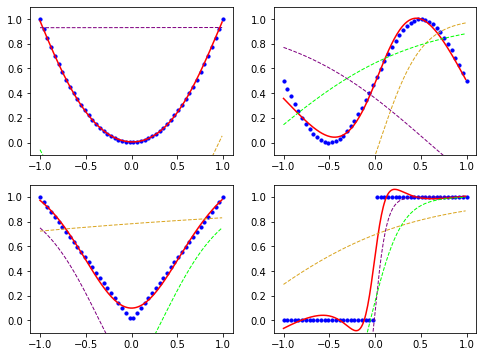

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nn.linear_nn import Linear_NeuralNet
%matplotlib inline

N = 50 # The number of test data

def multi_func(x,f_name='square'):
    if f_name == 'square':
        f = x**2
    elif f_name == 'heaviside':
        f = 0.5 * (np.sign(x) + 1)
    elif f_name == 'sinusoidal':
        f = 0.5 + 0.5 * np.sin(x * np.pi)
    elif f_name == 'absolute':
        f = np.abs(x)
    return f


# training data
train_x = np.linspace(-1, 1, N).reshape(N, 1)

# test data
test_x = np.arange(-1,1,0.01)

fig = plt.figure(figsize=(8, 6))
color_list = ['goldenrod','purple','lime']

for n,f_name in enumerate(['square','sinusoidal','absolute','heaviside'],1):
    train_y = multi_func(train_x,f_name)
    # Construncting NeuralNet
    model = Linear_NeuralNet(1,3,1)
    model.fit(train_x,train_y)
    y = model(test_x)
    # Plotting training data
    ax = fig.add_subplot(2,2,n)
    ax.scatter(train_x, train_y,s=10,color='blue')
    ax.plot(test_x, y, 'r-')
    plt.ylim([-0.1, 1.1])
    # Plotting the output of hidden layer
    test_z = model.get_hidden_output(test_x)
    for i in range(np.size(test_z,1)):
        ax.plot(test_x, test_z[:,i],color=color_list[i],linestyle='dashed',linewidth=1)
plt.show()

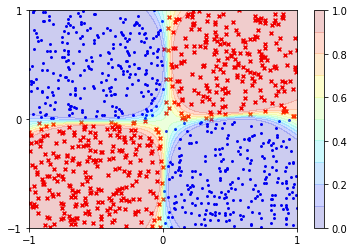

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nn.classifier_nn import Classifier_NeuralNet

def create_noise_data(sample:int=1000):
    x = np.random.uniform(-1., 1., size=(sample, 2))
    labels = (np.prod(x, axis=1) > 0).astype(np.float)
    return x, labels.reshape(-1, 1)

# training dataset
train_x, labels = create_noise_data()

# test dataset
X,Y = np.meshgrid(np.linspace(-1, 1, 100),np.linspace(-1, 1, 100))
test_x = np.array([X.ravel(), Y.ravel()]).reshape(2,-1).T

'''-----Classification by Neural Network------'''
model = Classifier_NeuralNet(2,4,1)
model.fit(train_x,labels,n_iter=500,learning_rate=0.01)
Z = model.predict(test_x)


# plot the training data
colors = ["blue", "red"]
markers = [".","x"]
set_color = [colors[int(cls_n)] for cls_n in labels]
set_marker = [markers[int(cls_n)] for cls_n in labels]
for n in range(len(labels)):
    plt.scatter(train_x[n, 0], train_x[n, 1], c=set_color[n],marker=set_marker[n],s=15)

# plot the test data
plt.contourf(X, Y, Z.reshape(X.shape), levels=np.linspace(0, 1, 11), alpha=0.2,cmap='jet')
plt.colorbar()
# axis setting
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.show()

### <span style="color: red; ">Weight update procedure</span>
<br>
1. Forward-propagation : Perform forward propagation using the following equation $\qquad[\varphi(\cdot):\text{activation function}]$
<br><br>
$$
a_j^{(\ell)}=\sum_iw_{ji}z_i^{(\ell-1)}\qquad\quad z_j^{(\ell)}\equiv \varphi\left(a_j^{(\ell)}\right)=\varphi\left( \sum_iw_{ji}z_i^{(\ell-1)}\right)
$$
<br><br>
2. Back-propatagion : Compute the error $\,\delta\,$ of output unit and all hidden units in the network.
<br><br>
$$
\begin{cases}
    \delta_j^{(\ell)}\,=\varphi'\left(a_j^{(\ell)}\right){\displaystyle \sum_k}w_{kj}^{(\ell+1)}\delta_k^{(\ell+1)}\qquad\left[\,1\leqq \ell\leqq L-1\,\right]\\
    \delta_j^{(L)}=y_j-t_j
\end{cases}
$$
<br><br>
3. Compute the gradient of cost function with respect to the weight matrix
<br><br>
$$
 \frac{\partial E_n}{\partial w_{ji}^{(\ell)}}=\delta_j^{(\ell)}z_i^{(\ell-1)}
$$
<br><br>
4. Update the weights using the method "Stochastic gradient descent (SGD)"
<br><br>
$$
\boldsymbol{\bf w}^{(\text{new})}=\boldsymbol{{\bf w}}^{(\text{old})}-\eta\,\left.\frac{\partial }{\partial \boldsymbol{{\bf w}}}E_n(\boldsymbol{{\bf w}})\right|_{\boldsymbol{\bf w}=\boldsymbol{\bf w}^{(\text{old})}}
$$

##  5.5. Regularization in Neural Networks

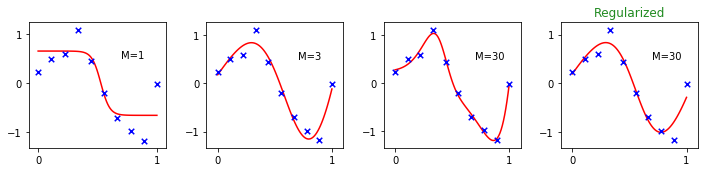

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from nn.scaled_conjgrad import Scaled_CG

def create_noise_data(Noise_NUM=10):
    x = np.linspace(0, 1, Noise_NUM)[:, None]
    return x, np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=(10, 1))

# create training data
train_x,train_y = create_noise_data()

# create test data
test_x = np.linspace(0,1,100)

plt.figure(figsize=(10, 2.5))
for i,(n_unit,hyper_param) in enumerate(zip([1,3,30,30],[0,0,0,1e-2]),1):
    plt.subplot(1,4,i)
    model = Scaled_CG(1,n_unit,1,alpha=hyper_param)
    model.fit(train_x,train_y)
    test_y = model(test_x)
    plt.plot(test_x,test_y,color="r",zorder=1)
    plt.scatter(train_x.ravel(), train_y.ravel(), marker="x", color="b",zorder=2,s=30)
    plt.annotate("M={}".format(n_unit), (0.7, 0.5),fontsize=10)
    plt.xticks([0,1])
    plt.yticks([-1,0,1])
    if not(np.allclose(0,hyper_param)):
    	plt.title('Regularized',color='forestgreen')
    plt.subplots_adjust(wspace=1.5)
plt.tight_layout()
plt.show()